In [1]:
# Para gestionar el feature scaling
# -----------------------------------------------------------------------
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler, RobustScaler

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
# Tratamiento de datos
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../../")
from src.soporte_graficas import (
    boxplot_scaler
)

In [2]:
df = pd.read_csv("../../datos/04_rent_target_onehot_encoded.csv")

# Cuales escalar
- Todas las no binarias


# Aplicamos Feature Scaling... Pero ¿Cual?
Tenemos los Siguientes pero antes:

### ¿Qué importancia tienen los outliers?
- **RobustScaler:** Es el mas "amigable" con los outliers,genera un rango de 0 a X (depende de cuantos datos tengamos) donde aún manteniendo la distribución los tenemos más juntos, si queremos darles mucho peso es nuestra mejor opción

- **StandardScaler:** También es amigable con los outliers, pero genera un rango de 0 a X mucho menos que el anterior, mantiene la distribución, si queremos darles algo de peso a los outliers, este es definitivamente nuestro amigo.

- **MinMaxScaler:** Genera un rango de 0 a 1 donde mantiene la distribución original pero está todo mucho más comprimido, aquí los outliers no se van a poder apreciar, así que si no te interesan y tus datos no están normalizados... es tu opción

- **Normalizer:** Tus datos están normalizados y no te interesan los outliers?, Está es tu opción, Genera un Rango de -1 a 1 en donde mantiene la distribución (como el resto). Es solo para datos normalizados, algo que veremos poco por aquí... 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 38 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   price                      353 non-null    float64
 1   size                       353 non-null    float64
 2   bathrooms                  353 non-null    float64
 3   distancia_centro           353 non-null    float64
 4   municipality               353 non-null    float64
 5   propertyType_chalet        353 non-null    float64
 6   propertyType_countryHouse  353 non-null    float64
 7   propertyType_duplex        353 non-null    float64
 8   propertyType_flat          353 non-null    float64
 9   propertyType_penthouse     353 non-null    float64
 10  propertyType_studio        353 non-null    float64
 11  status_desconocido         353 non-null    float64
 12  status_good                353 non-null    float64
 13  status_newdevelopment      353 non-null    float64

# Vamos a usar RobustScaler
- Quiero mantener los outliers con peso, pueden aportar valor

In [4]:
cols_escalar = ["size","bathrooms","municipality","distancia_centro"]
escalador_robust = RobustScaler()
datos_transf_robust = escalador_robust.fit_transform(df[cols_escalar])
df_c = pd.DataFrame(datos_transf_robust,columns=df[cols_escalar].columns)
df.drop(columns=cols_escalar, inplace=True)
df = pd.concat([df_c,df],axis=1)

In [5]:
df.sample()

,size,bathrooms,municipality,distancia_centro,price,propertyType_chalet,propertyType_countryHouse,propertyType_duplex,propertyType_flat,propertyType_penthouse,...,floor_segundo,floor_septimo,floor_sexto,floor_sotano,floor_tercero,exterior_vista exterior,exterior_vista interior,hasLift_desconocido,hasLift_no tiene ascensor,hasLift_tiene ascensor
352,0.2,0.0,-0.009539,0.5302,695.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


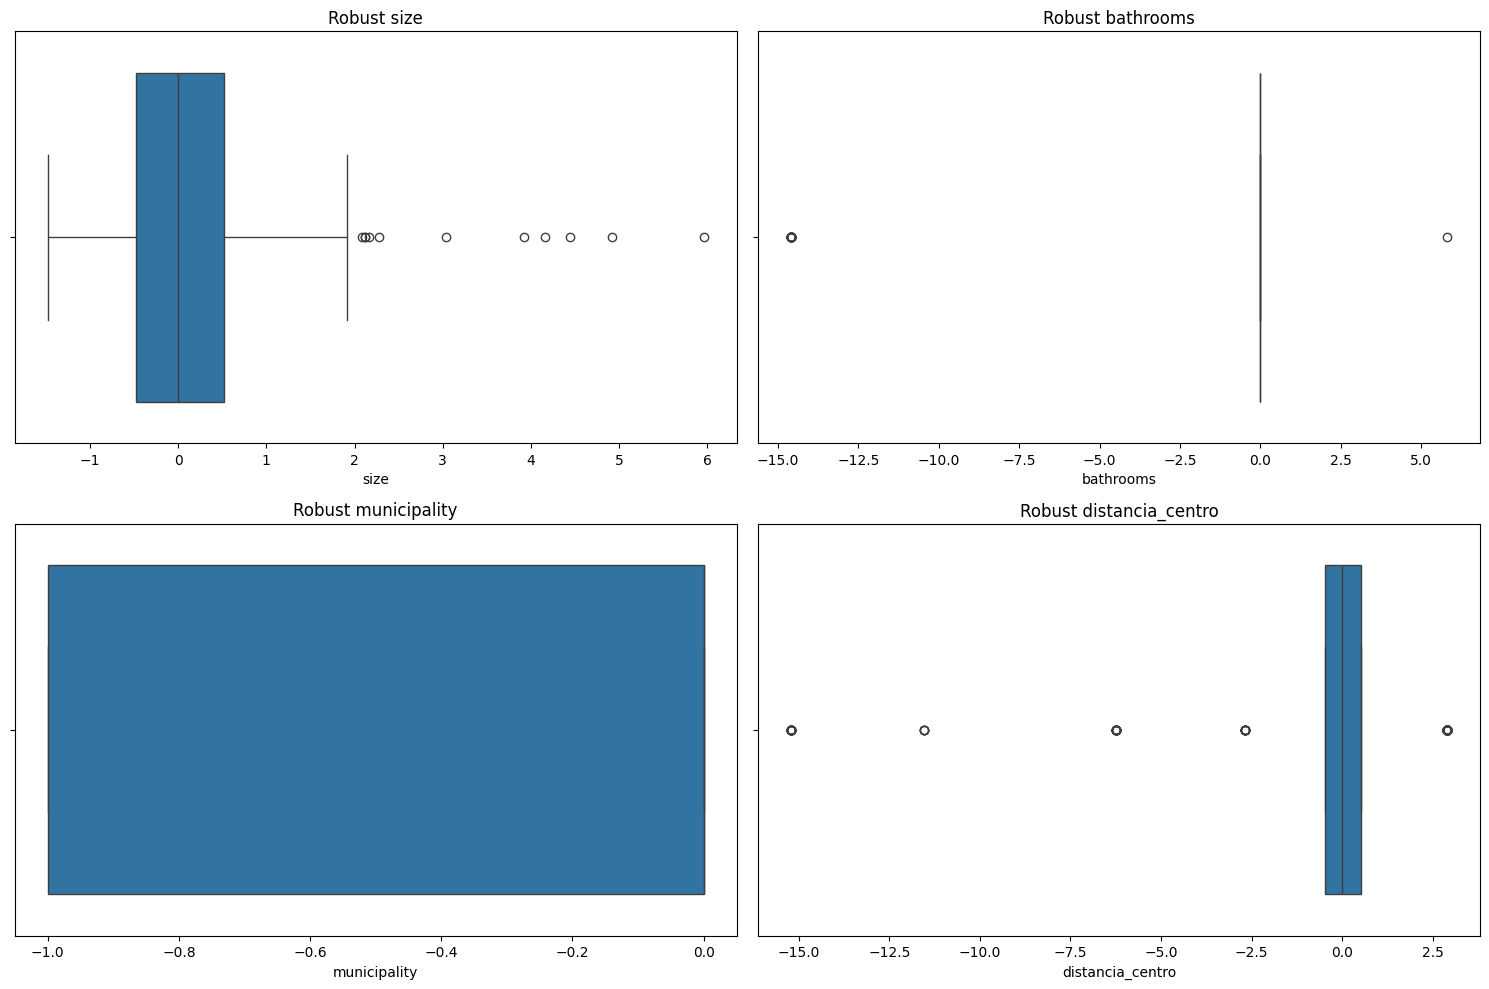

In [6]:
cols_escalar = ["size","bathrooms","municipality","distancia_centro"]
boxplot_scaler(df,cols_escalar,"Robust")

In [7]:
df.to_csv("../../datos/05_rent_featuredscaled.csv",index=False)